In [1]:
import pandas as pd

data = pd.read_csv('./data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
labels = data.diagnosis
sample = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

train_sample, test_sample, train_labels, test_labels = train_test_split(sample, labels, test_size=0.3, random_state=42)

cf = RandomForestClassifier(random_state=55, n_estimators=20)
cf = cf.fit(train_sample, train_labels)

model = SelectFromModel(cf, prefit=True)
sample_1 = model.transform(sample)
train_sample_1, test_sample_1, train_labels_1, test_labels_1 = train_test_split(sample_1, labels, test_size=0.3, random_state=42)

cf_1 = RandomForestClassifier(random_state=55, n_estimators=20)
cf_1 = cf_1.fit(train_sample_1, train_labels_1)

ac = accuracy_score(test_labels_1, cf_1.predict(test_sample_1))
print("Accuracy is: ", ac)

Accuracy is:  0.9590643274853801


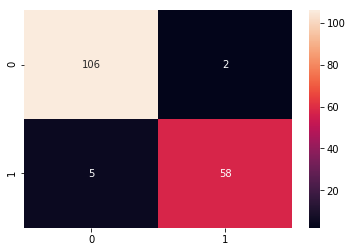

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels_1, cf_1.predict(test_sample_1))
sns.heatmap(cm, annot=True, fmt='d')